### Importacion de dependencias

In [1]:
import torch #nucleo de pytorch
import torch.optim as optim #importamos el modulo de optimizadores de pytorch
from torchvision import datasets, transforms # importamos datasets ya preparados.
import torch.nn as nn  #importamos el modulo de redes neuronales de pytorch
from torch.utils.data import DataLoader #Nos sirve para cargar los datos en porciones y hacer un barajado.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
train_dataset = datasets.CIFAR10(
    root= "./data",
    train=True,
    download=True,
    transform=transform
)

#TODO: Carga el dataset de Test.
test_dataset = datasets.CIFAR10(
    root= "./data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 170M/170M [00:12<00:00, 13.1MB/s]


In [4]:
#TODO: Crear el DataLoader para el set de train
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [12]:
#TODO: Crear el DataLoader para el set de test.
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')


In [6]:
class CIFAR10MLP(nn.Module):
    def __init__(self):
        super(CIFAR10MLP, self).__init__()
        self.flatter = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(32*32*3, 512),  # 3072 entradas
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)        # 10 clases CIFAR-10
        )

    def forward(self, x):
        x = self.flatter(x)
        return self.net(x)


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CIFAR10MLP().to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
epochs = 10
loss_list, acc_list = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    loss_list.append(avg_loss)
    acc_list.append(accuracy)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1/10, Loss: 1.7377, Accuracy: 38.01%
Epoch 2/10, Loss: 1.5670, Accuracy: 45.03%
Epoch 3/10, Loss: 1.4810, Accuracy: 47.65%
Epoch 4/10, Loss: 1.4154, Accuracy: 49.89%
Epoch 5/10, Loss: 1.3721, Accuracy: 51.51%
Epoch 6/10, Loss: 1.3209, Accuracy: 53.36%
Epoch 7/10, Loss: 1.2864, Accuracy: 54.56%
Epoch 8/10, Loss: 1.2483, Accuracy: 55.97%
Epoch 9/10, Loss: 1.2138, Accuracy: 57.09%
Epoch 10/10, Loss: 1.1831, Accuracy: 58.04%


### Grafico de la perdida y accuracy

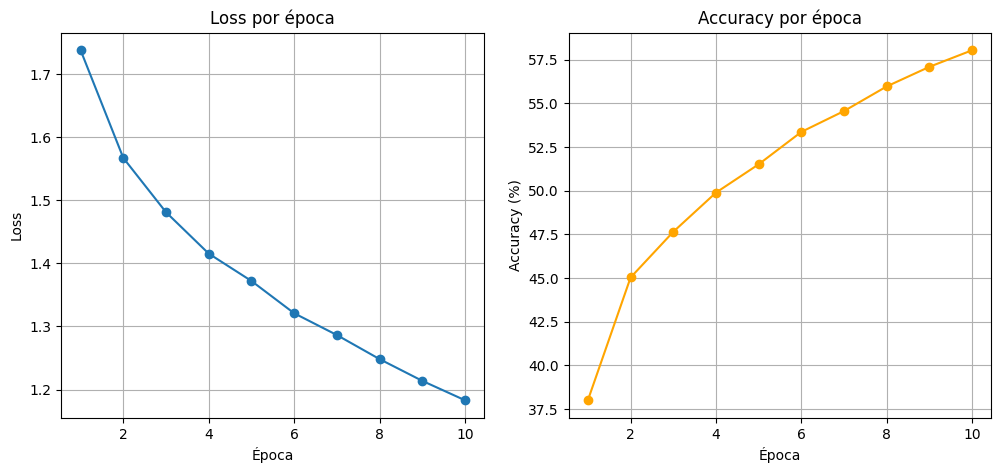

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), loss_list, marker='o')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), acc_list, marker='o', color='orange')
plt.title('Accuracy por época')
plt.xlabel('Época')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.show()


CIFER 10
classes = 
('plane'
,'car',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck')




### Prediccion

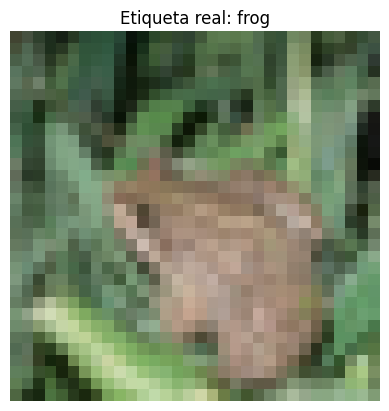

Predicción del modelo: frog


In [26]:
i = 4
images, labels = next(iter(test_loader))
image = images[i].to(device).unsqueeze(0)
label = labels[i].item()  # convertir a entero

# Mostrar imagen
plt.imshow(images[i].permute(1,2,0)/2 + 0.5)  # des-normalizamos
plt.title(f'Etiqueta real: {classes[label]}')
plt.axis('off')
plt.show()

# Predicción
model.eval()
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)
    print(f'Predicción del modelo: {classes[predicted.item()]}')
